## Useful script to count and visualize word frequencies

#### Import packages and data:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import regex as re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk import ne_chunk, pos_tag
from textblob.sentiments import NaiveBayesAnalyzer
import plotly as plotly
import plotly.plotly as py
from IPython.core.display import Image 
plotly.tools.set_credentials_file(username='JonathanMarin', api_key='JRrW2MSjrq4LwNVWy2Y7')
import plotly.graph_objs as go

In [3]:
# Import dummy text
dummy_text = "Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu. In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus. Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc"
print(dummy_text)

Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu. In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus. Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. N

## Define function to clean text and output word frequencies

In [4]:
def word_frequencies(text, number):
    
    #Clean text by removing all unwanted punctuations
    text = re.sub(r'[^\w\s]','',text)
    
    #Split words into a list of words
    all_words = text.split()

    #Turn all words to lower to avoid counting words twice cause of capital letters etc.
    all_words = [word.lower() for word in all_words]

    #Remove stopwords as these are of no analytical value
    all_words_filtered = [word for word in all_words if word not in stopwords.words('danish')]

    #Count frequencies of words:
    all_words_filtered = pd.Series(all_words_filtered)
    all_words_filtered = all_words_filtered.value_counts() #finds frequencies of words and lists them in descending order

    #Plot the top 50 most mentioned words:
    data = [go.Bar(
            x = all_words_filtered.index.values[int(number):15],
            y = all_words_filtered.values[int(number):15],
            marker= dict(colorscale='Jet', color = all_words_filtered.values[int(number):100]), text='Word counts')]

    layout = go.Layout(title='Word frequencies in the dataset')
    fig = go.Figure(data=data, layout=layout)
    return(py.iplot(fig, filename='basic-bar'))

### Apply function

In [5]:
#Applying function
k = word_frequencies(dummy_text, 0)

#plot doesnt show due to github not offline rendering plotly plots so iøve put it as a .png below

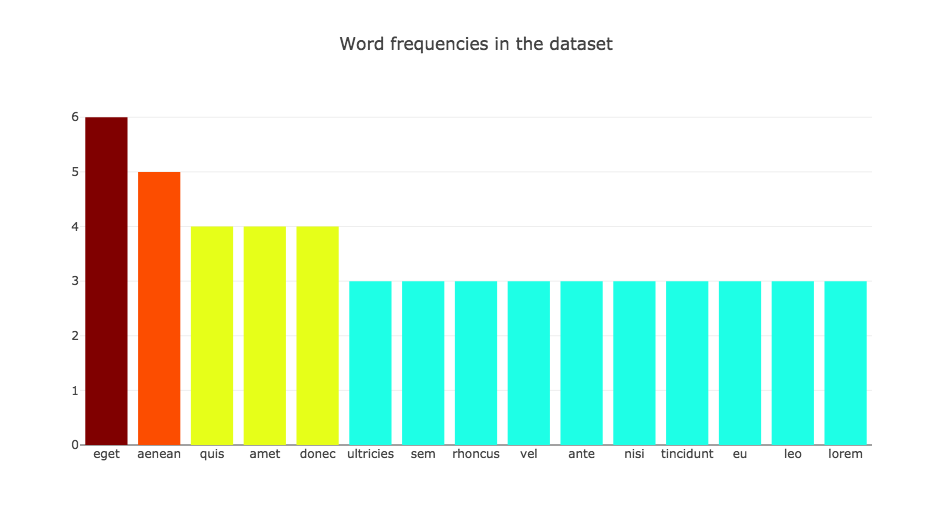

In [8]:
Image(filename='newplot (3).png')